# Evaluating pairs of detectors

## Setup

### Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm
import random

In [16]:
sys.path.append(os.path.join(os.getcwd(), '..', '..'))
from src.data.scoreloader import Scoreloader
from src.data.dataloader import Dataloader

### Paths

In [25]:
# Dataloader & Scoreloader
data_dir = os.path.join('..', '..', "data")
scores_dir = os.path.join(data_dir, "scores")
dataloader = Dataloader(os.path.join(data_dir, "raw"), os.path.join(data_dir, "TSB_128"), os.path.join(data_dir, "features", "TSFRESH_TSB_128"))
scoreloader = Scoreloader(scores_dir)

In [37]:
# Results path
results_dir = os.path.join('..', '..', 'experiments', 'combination_matrix')

### Variables

In [29]:
datasets = [x for x in dataloader.get_dataset_names() if "NASA" not in x]

In [30]:
detectors = scoreloader.get_detector_names()

In [31]:
cmaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 
'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 
'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 
'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 
'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 
'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 
'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 
'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn',
'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 
'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 
'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r',
'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 
'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 
'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r',
'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 
'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 
'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 
'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

# "rocket_r", "YlOrRd", "gnuplot2_r", "hot_r"
pallete = random.choice(cmaps)
print(pallete)

winter


### Helper functions

In [32]:
def dataframe_to_matrix(df, fnames, detectors):
    """
    Convert the DataFrame back to a matrix.
    
    Parameters:
        df (pandas.DataFrame): The DataFrame to be converted.
        fnames (list): List of time series names.
        detectors (list): List of detector names.
        
    Returns:
        numpy.ndarray: The matrix containing the data from the DataFrame.
    """
    n_time_series = len(fnames)
    n_detectors = len(detectors)
    
    matrix = np.zeros((n_time_series, n_detectors, n_detectors))
    
    for idx, row in df.iterrows():
        ts_idx = fnames.index(row['Time Series'])
        det_pair = row['Detector Pair'].split('-')
        det1_idx = detectors.index(det_pair[0])
        det2_idx = detectors.index(det_pair[1])
        
        matrix[ts_idx][det1_idx][det2_idx] = row['AUC-PR']
    
    return matrix

## Load and display data

In [38]:
matrices = []
dfs = []
for dataset in datasets:
    loaded_df = pd.read_csv(os.path.join(results_dir, f"matrix_{dataset}.csv"))
    fnames = loaded_df['Time Series'].unique().tolist()
    matrices.append(dataframe_to_matrix(loaded_df, fnames, detectors))
    dfs.append(loaded_df)

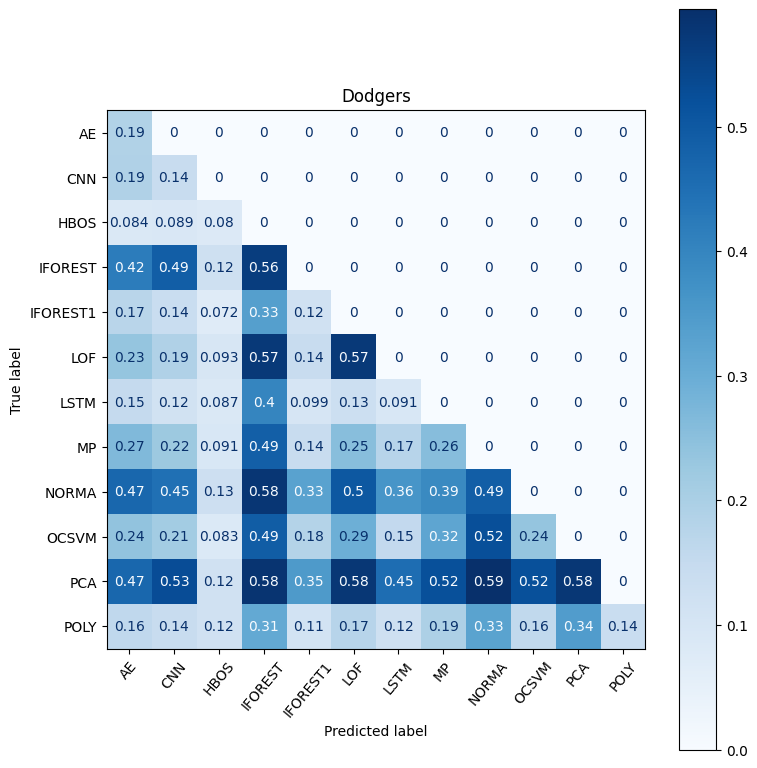

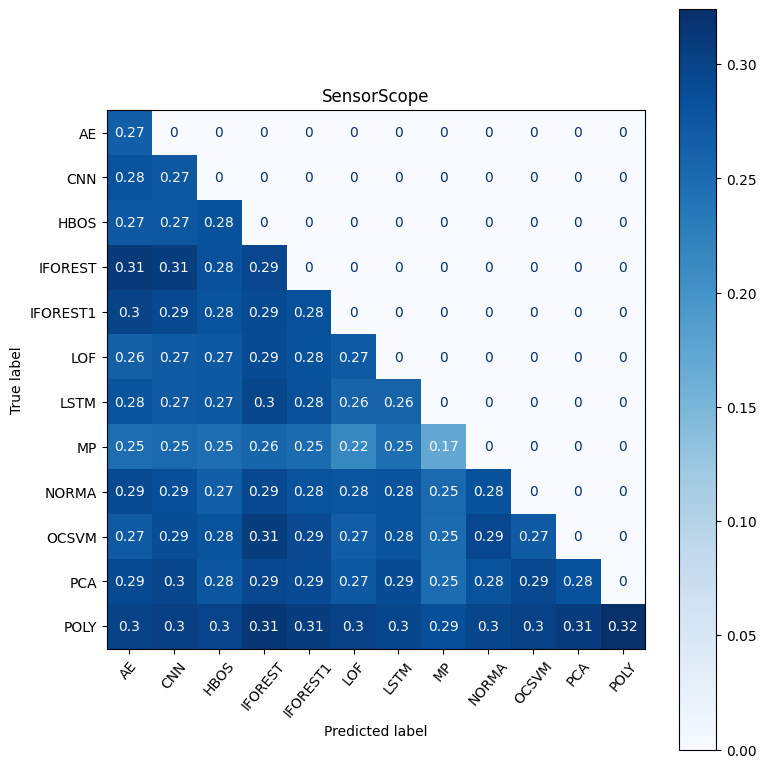

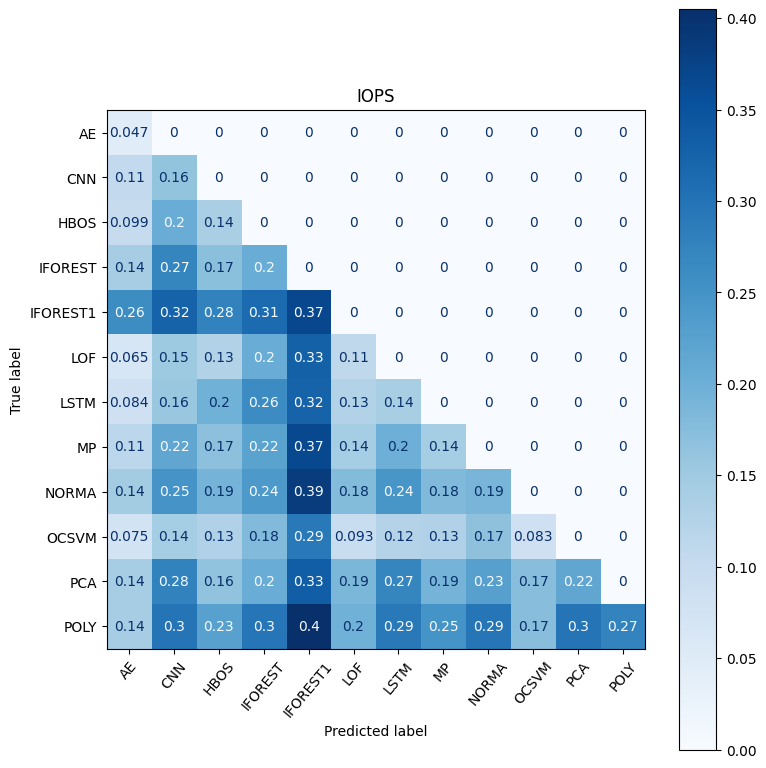

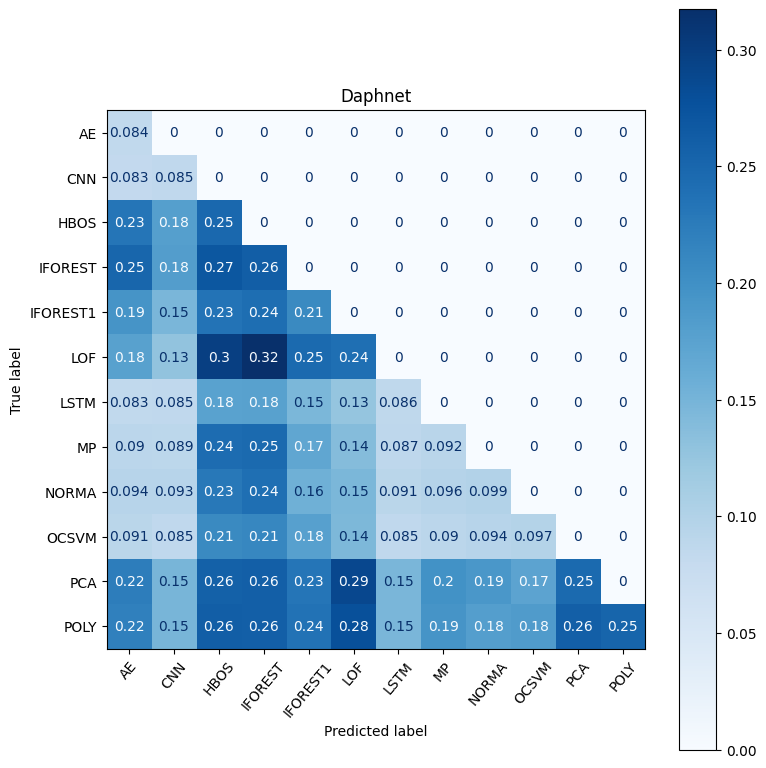

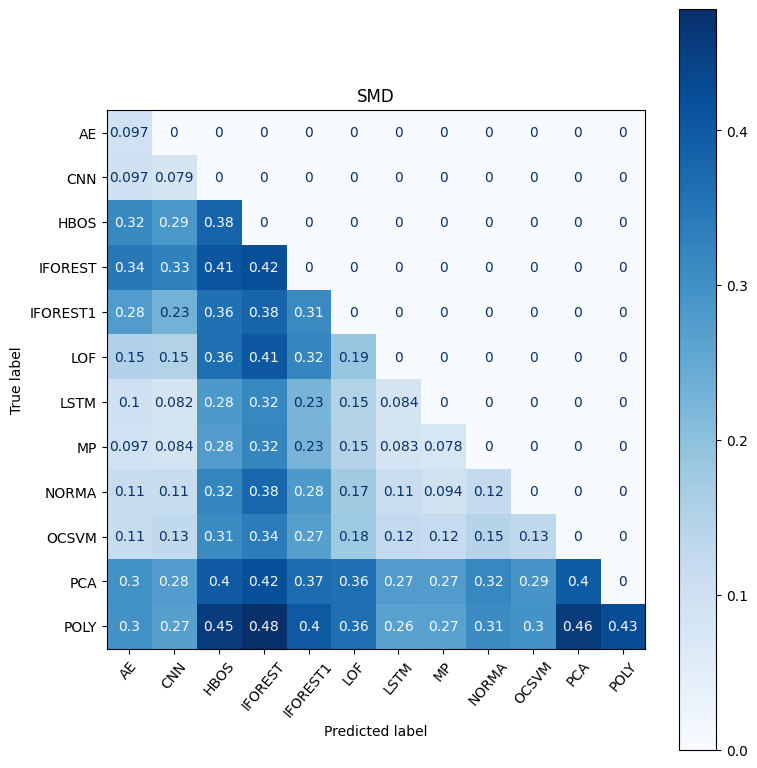

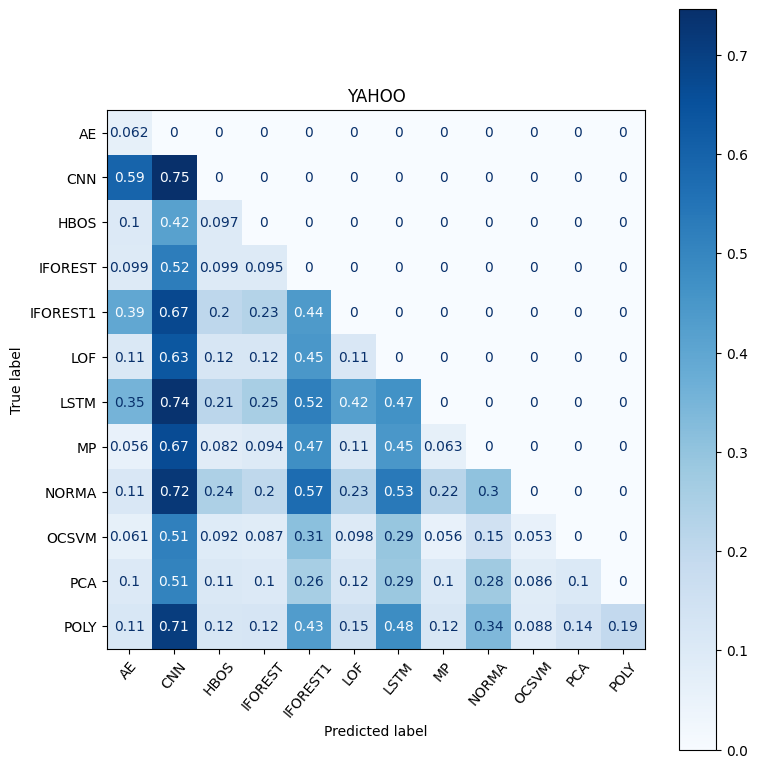

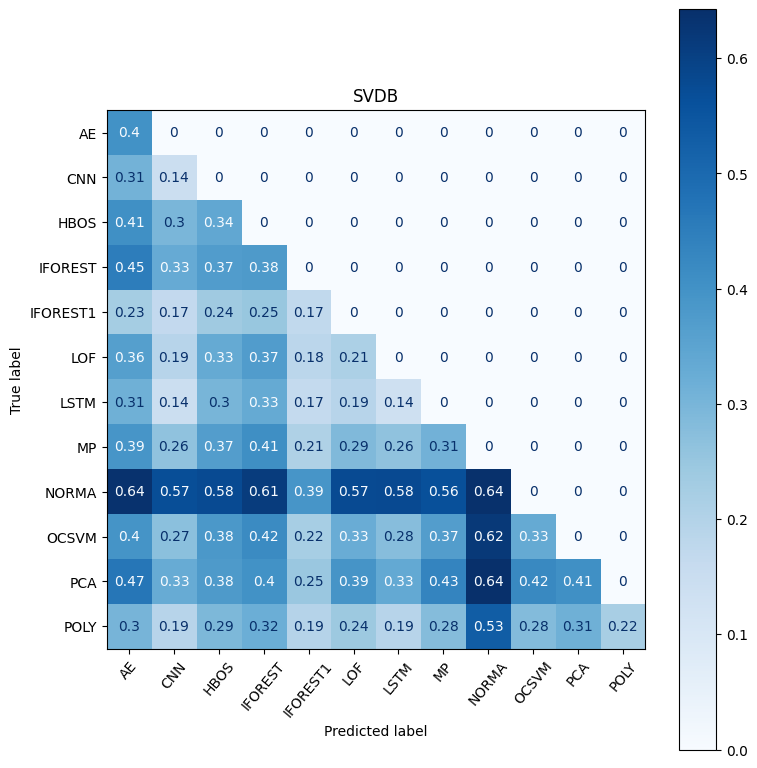

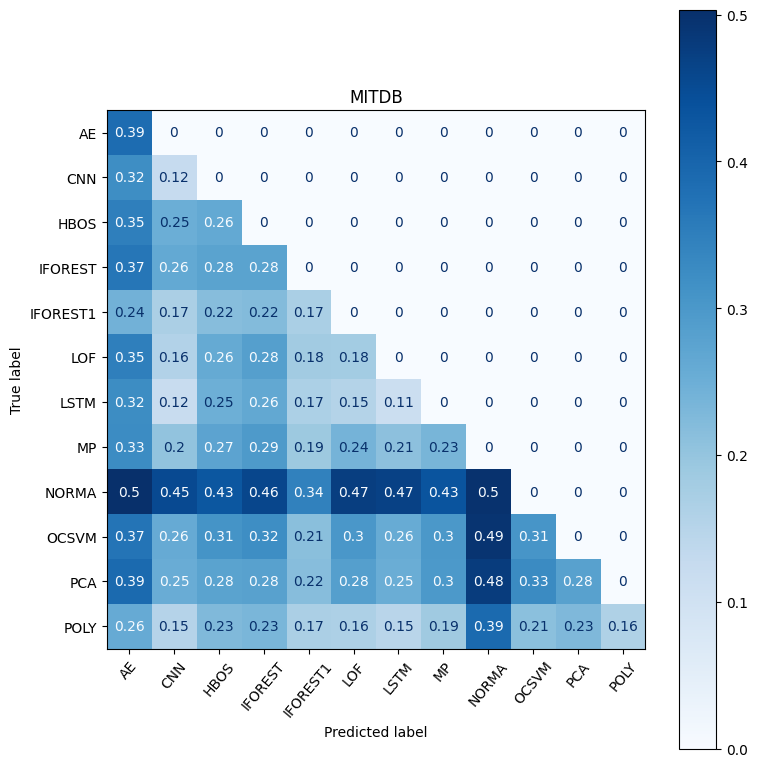

In [39]:
avg_matrices = []
for matrix, dataset in zip(matrices, datasets[:8]):
    avg_matrices.append(np.average(matrix, axis=0)) 

    fig, ax = plt.subplots(figsize=(8, 8))
    disp = ConfusionMatrixDisplay(avg_matrices[-1], display_labels=detectors)
    disp.plot(xticks_rotation=50, ax=ax, cmap="Blues")# "rocket_r"
    plt.tight_layout()
    plt.title(dataset)
    # plt.savefig(os.path.join(results_dir, f"avg_matrix_{dataset}"))
    plt.show()

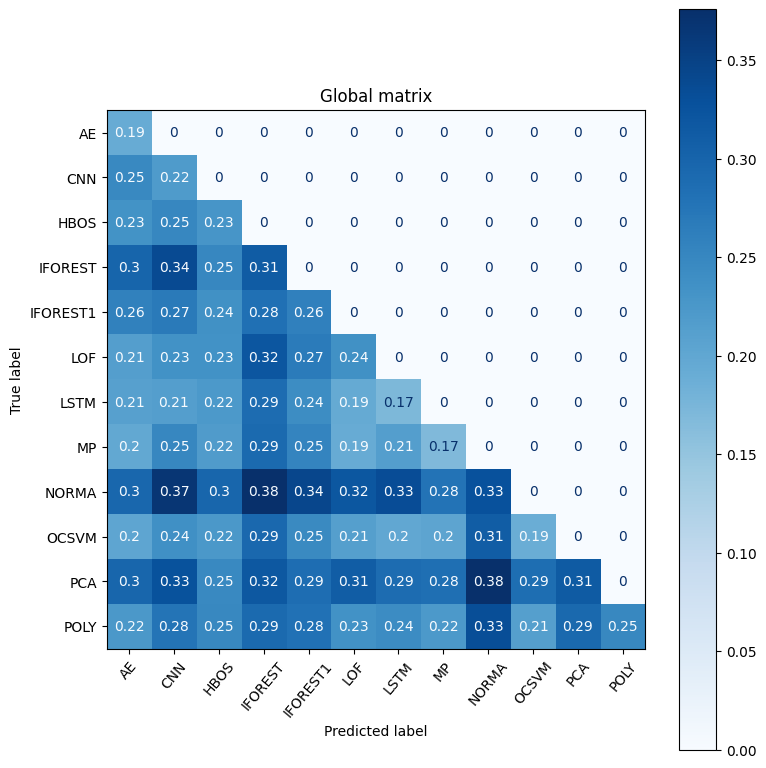

In [41]:
global_avg_matrix = np.average(np.stack(avg_matrices), axis=0)

fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(global_avg_matrix, display_labels=detectors)
disp.plot(xticks_rotation=50, ax=ax, cmap="Blues")# "rocket_r"
plt.tight_layout()
plt.title("Global matrix")
# plt.savefig(os.path.join(results_dir, f"avg_matrix_{dataset}"))
plt.show()

### Am I better with friends experiment

In [42]:
for i, dataset in enumerate(datasets):
    print(i, dataset)

0 Dodgers
1 SensorScope
2 IOPS
3 Daphnet
4 SMD
5 YAHOO
6 SVDB
7 MITDB
8 NAB
9 KDD21
10 OPPORTUNITY
11 MGAB
12 Occupancy
13 Genesis
14 GHL
15 ECG


In [43]:
detectors_combo_scores = {}
for i in detectors:
    detectors_combo_scores.update({i: {}})
    for k in detectors:
        detectors_combo_scores[i].update({k: []})
        
dataset_index = 3
# for curr_matrix in matrices[dataset_index:dataset_index + 1]:
for curr_matrix in matrices:
    for matrix in curr_matrix:
        for i in range(len(detectors)):
            for k in range(len(detectors)):
                if i > k:
                    detectors_combo_scores[detectors[i]][detectors[k]].append(matrix[i, k])
                else:
                    detectors_combo_scores[detectors[i]][detectors[k]].append(matrix[k, i])

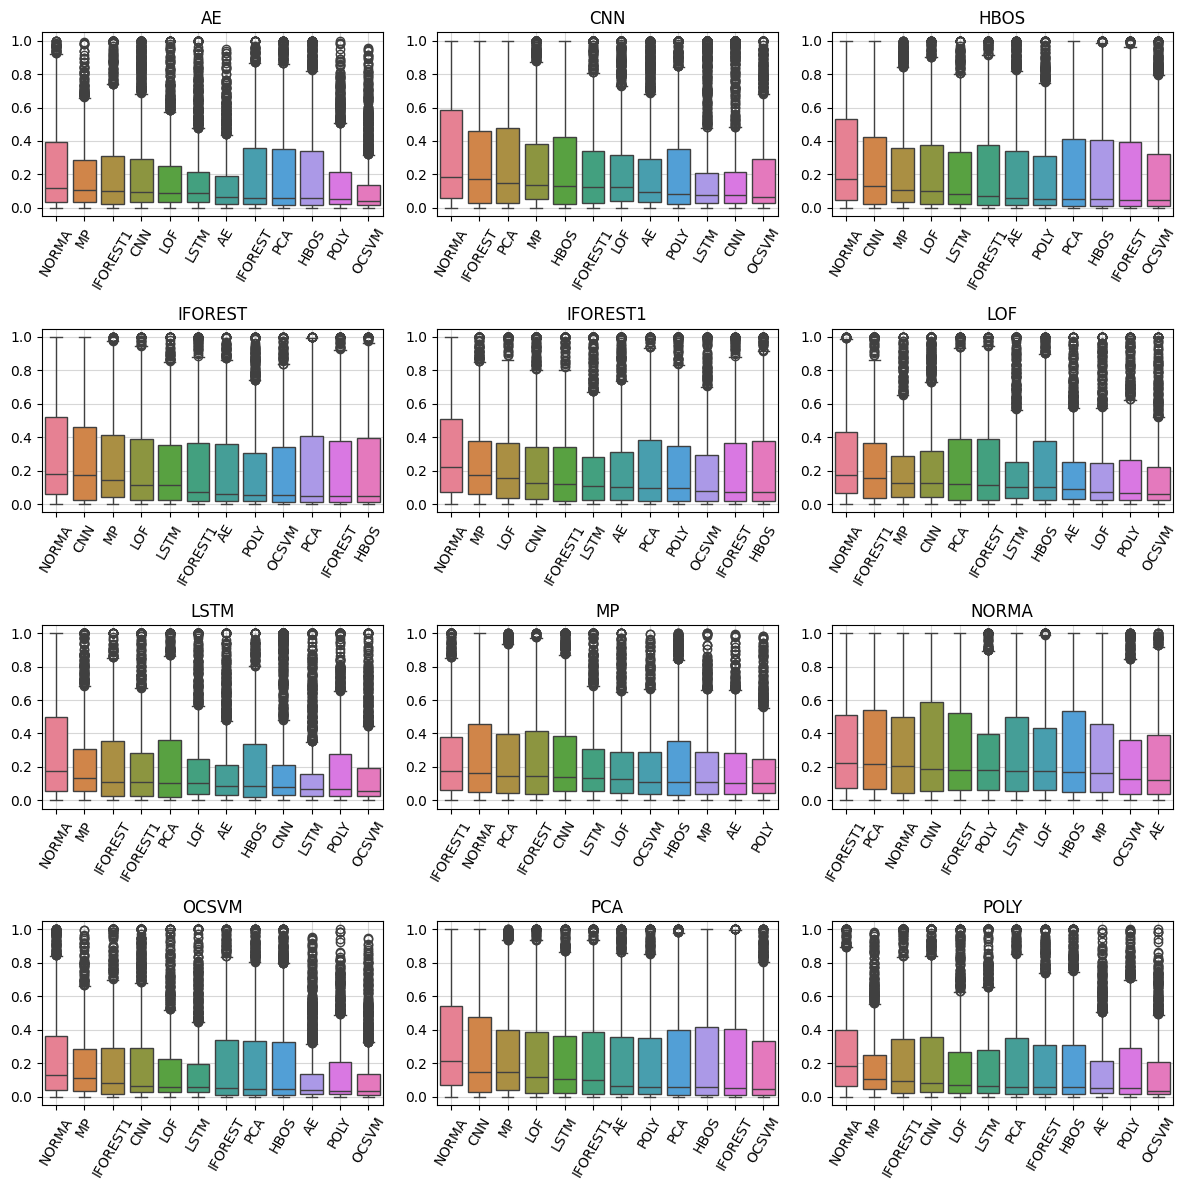

In [44]:
plt.figure(figsize=(12, 12))
# print(datasets[dataset_index])

for i, detector in enumerate(detectors):
    plt.subplot(4, 3, i + 1)
    
    tmp_df = pd.DataFrame(detectors_combo_scores[detector])
    # print(tmp_df.shape)
    meds = tmp_df.median()
    meds.sort_values(ascending=False, inplace=True)
    tmp_df = tmp_df[meds.index]
    
    sns.boxplot(tmp_df)
    plt.xticks(rotation=60)
    plt.title(detector)
    plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

## Detectors correlation

In [51]:
results_dir = os.path.join('..', '..', 'experiments', 'correlation')
dfs = []
for dataset in datasets:
    loaded_df = pd.read_csv(os.path.join(results_dir, f"auc_{dataset}.csv"), index_col=0)
    dfs.append(loaded_df)
df = pd.concat(dfs)
df.sample(3)

,AE,CNN,HBOS,IFOREST,IFOREST1,LOF,LSTM,MP,NORMA,OCSVM,PCA,POLY
MITDB/201.test.csv@1.out,0.764054,0.300330,0.456473,0.450746,0.323646,0.279522,0.315449,0.406696,0.876015,0.702763,0.377715,0.229721
IOPS/KPI-1c6d7a26-1f1a-3321-bb4d-7a9d969ec8f0.train.out,0.023063,0.347838,0.185867,0.024872,0.566813,0.004653,0.254271,0.073662,0.154092,0.076581,0.167370,0.613677
SMD/machine-3-6.test.csv@1.out,0.036851,0.119268,0.678336,0.523007,0.443493,0.150563,0.073466,0.118413,0.114082,0.210621,0.719494,0.185638


In [53]:
correlation_matrix = df.corr(method='pearson')

print(correlation_matrix)

# Optionally, save or visualize
# correlation_matrix.to_csv("detector_auc_correlation.csv")

                AE       CNN      HBOS   IFOREST  IFOREST1       LOF  \
AE        1.000000 -0.073959  0.254999  0.320839 -0.028971  0.202791   
CNN      -0.073959  1.000000 -0.220900 -0.181840  0.270793 -0.162787   
HBOS      0.254999 -0.220900  1.000000  0.842131  0.414867  0.144276   
IFOREST   0.320839 -0.181840  0.842131  1.000000  0.416786  0.140019   
IFOREST1 -0.028971  0.270793  0.414867  0.416786  1.000000  0.074932   
LOF       0.202791 -0.162787  0.144276  0.140019  0.074932  1.000000   
LSTM     -0.008344  0.710285 -0.113160 -0.082460  0.411726 -0.077039   
MP        0.456393 -0.158087 -0.028534  0.006662 -0.227706  0.295515   
NORMA     0.558747  0.182567 -0.012171  0.071807 -0.086882  0.095298   
OCSVM     0.692579 -0.066668  0.338728  0.441356  0.102798  0.194920   
PCA       0.302848 -0.191915  0.806660  0.848719  0.425549  0.159370   
POLY      0.159314  0.049259  0.475111  0.588136  0.515450  0.221089   

              LSTM        MP     NORMA     OCSVM       PCA     

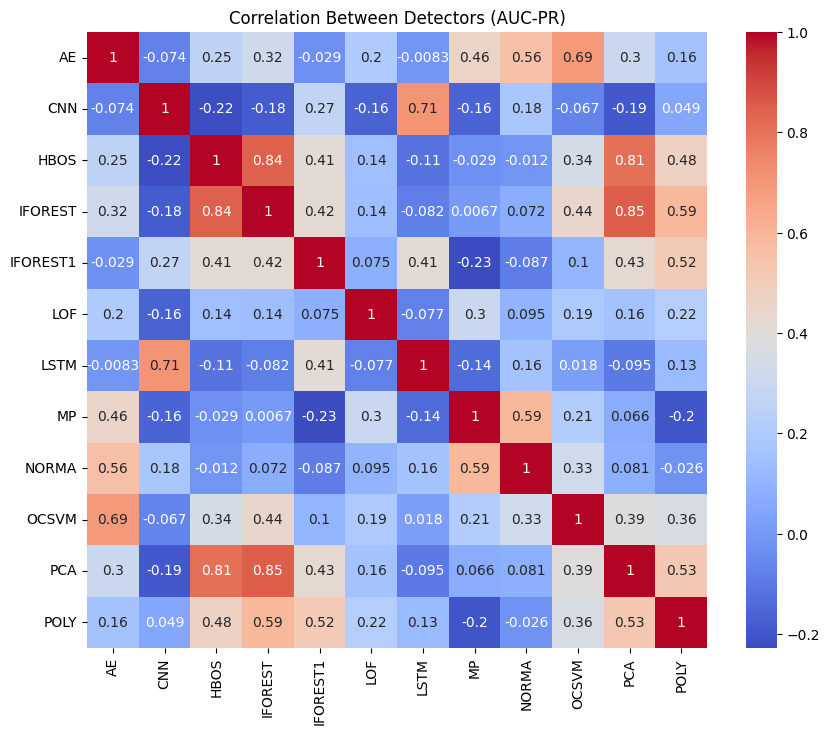

In [55]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Detectors (AUC-PR)")
plt.show()